# Preparation

In [1]:
import pandas as pd
import numpy as np
from numpy import expand_dims

#library to read and import file from drive
import os
import zipfile
from shutil import copyfile

from sklearn.model_selection import train_test_split

#images
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn_image as isns

#tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Folders

In [8]:
data_folder = "../Data"

#### Functions

In [3]:
#function to crop image 
def crop(img, mask=False):
    #gaussian filter
    tmp = cv.GaussianBlur(img,(5,5),0)

    ret1, th1 = cv.threshold(tmp[:,:,2], 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
    ret2, th2 = cv.threshold(img[:,:,2],120, 255, cv.THRESH_BINARY)

    x, y, w, h = cv.boundingRect(th1)

    #return input image with crop and in b&w
    border = 0
    if(mask):
        return cv.resize(th2[y-border:y+h+border, x-border:x+w+border], (224,224))
    return cv.resize(img[y-border:y+h+border, x-border:x+w+border], (224,224))

In [68]:
#function to create prepared dataset with cropped images
def prepared_dataset(dir='./'):
    os.mkdir(data_folder + "/Preprocessed")
    os.mkdir(data_folder + "/Preprocessed/NOK")
    os.mkdir(data_folder + "/Preprocessed/OK")
    for folder in os.listdir(dir):
        for img in os.listdir(dir + '/' + folder):
            image = cv.imread((dir + '/' + folder + '/' + img))
            image = crop(image)
            if folder == "NOK":
                cv.imwrite(data_folder + "/Preprocessed/NOK/" + img, image)
            else:
                cv.imwrite(data_folder + "/Preprocessed/OK/" + img, image)

## Dataset load

In [9]:
zip = zipfile.ZipFile(data_folder + '/Original.zip')
zip.extractall(data_folder)
zip.close()

## Data exploration and visualization

#### Number of images for each class

In [11]:
list_NOK = os.listdir(data_folder + "/DatasetGP5Bicocca/NOK")
list_OK = os.listdir(data_folder + "/DatasetGP5Bicocca/OK")
number_NOK = len(list_NOK)
number_OK = len(list_OK)
print("The number of NO ok images is:", number_NOK)
print("The number of ok images is:", number_OK)

The number of NO ok images is: 19
The number of ok images is: 104


#### Example of OK and NOK images

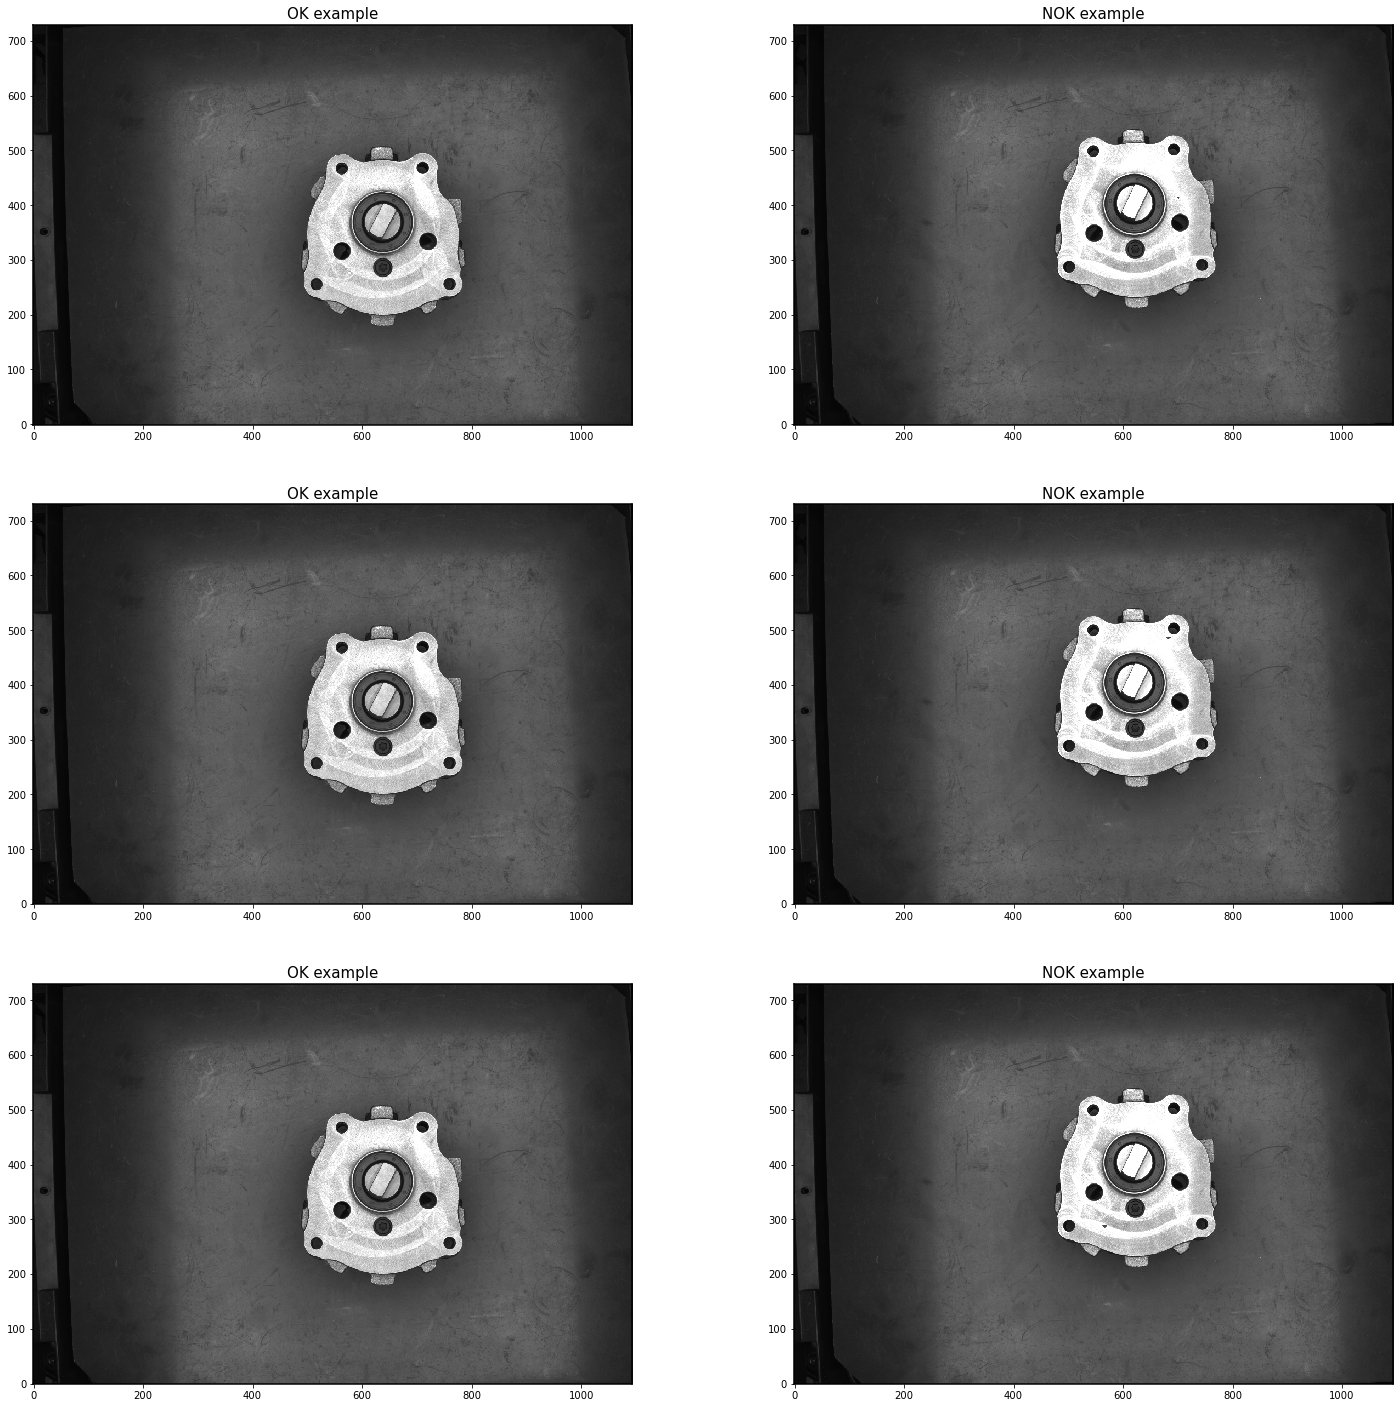

In [12]:
example_nok1 = cv.imread(data_folder + "/DatasetGP5Bicocca/NOK/NOK (18).bmp")
example_ok1 = cv.imread(data_folder + "/DatasetGP5Bicocca/OK/OK (1).bmp")
example_nok2 = cv.imread(data_folder + "/DatasetGP5Bicocca/NOK/NOK (15).bmp")
example_ok2 = cv.imread(data_folder + "/DatasetGP5Bicocca/OK/OK (2).bmp")
example_nok3 = cv.imread(data_folder + "/DatasetGP5Bicocca/NOK/NOK (16).bmp")
example_ok3 = cv.imread(data_folder + "/DatasetGP5Bicocca/OK/OK (3).bmp")
example_ok1 = cv.resize(example_ok1, (None), fx=0.2, fy=0.2)
example_nok1 = cv.resize(example_nok1, (None), fx=0.2, fy=0.2)
example_ok2 = cv.resize(example_ok2, (None), fx=0.2, fy=0.2)
example_nok2 = cv.resize(example_nok2, (None), fx=0.2, fy=0.2)
example_ok3 = cv.resize(example_ok3, (None), fx=0.2, fy=0.2)
example_nok3 = cv.resize(example_nok3, (None), fx=0.2, fy=0.2)

plt.figure(figsize=(25,25))

plt.subplot(3,2,1)
plt.title("OK example")
plt.imshow(example_ok1)
plt.subplot(3,2,2)
plt.title("NOK example")
plt.imshow(example_nok1)
plt.subplot(3,2,3)
plt.title("OK example")
plt.imshow(example_ok2)
plt.subplot(3,2,4)
plt.title("NOK example")
plt.imshow(example_nok2)
plt.subplot(3,2,5)
plt.title("OK example")
plt.imshow(example_ok3)
plt.subplot(3,2,6)
plt.title("NOK example")
plt.imshow(example_nok3)

Da queste immagini si può notare come la caratteristica principale delle immagini NOK è quella di presentare delle piccole macchie nere sulla superficie del pezzo (dovuto alla mancanza di materiale).
Si osserva che le dimensioni dei difetti sono molto ridotte e questo fatto dovrà essere tenuto in considerazione nella fase di selezione del modello.

### Histogram images comparison

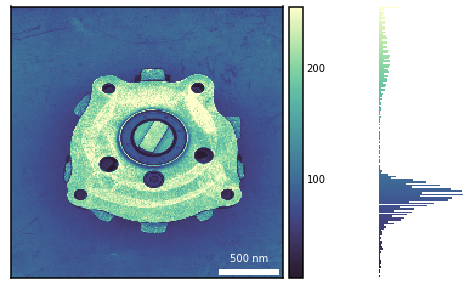

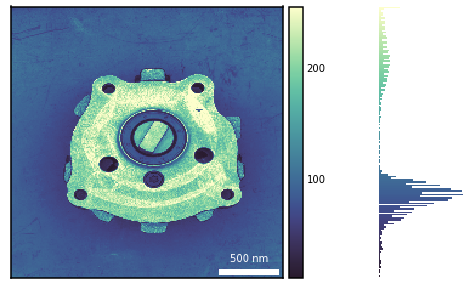

In [25]:
example_ok = cv.imread(data_folder + "/DatasetGP5Bicocca/OK/OK (1).bmp")
example_nok = cv.imread(data_folder + "/DatasetGP5Bicocca/NOK/NOK (7).bmp")

example_crop_ok = crop(example_ok)
example_crop_nok = crop(example_nok)
f = isns.imghist(example_crop_ok[:, :, 0], dx=0.01, units="um")
j = isns.imghist(example_crop_nok[:, :, 0], dx=0.01, units="um")

## Cleaning

#### Crop production piece from image

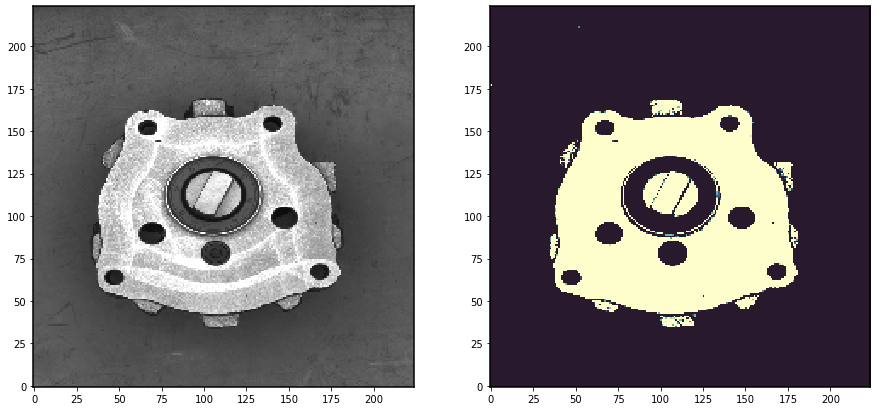

In [30]:
#example of crop function
example_tmp_nok1 = cv.imread(data_folder + "/DatasetGP5Bicocca/NOK/NOK (4).bmp")

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(crop(example_tmp_nok1))
plt.subplot(1,2,2)
plt.imshow(crop(example_tmp_nok1, True))


## Save prepared dataset

In [70]:
prepared_dataset(data_folder + "/DatasetGP5Bicocca")